## Now Training Multiple Models and Comparing Performance Using PyCaret
- GitHub link: https://github.com/pycaret/pycaret
- Documentation and tutorials also found on the GitHub

In [1]:
# General imports
import pycaret
from pycaret.classification import *
import pandas as pd
pycaret.__version__

'3.3.2'

In [2]:
# load in data 
train_data = pd.read_csv("../motum/data_for_pycaret_train.csv")
test_data = pd.read_csv("../motum/data_for_pycaret_test.csv")
print(train_data.shape)
print(test_data.shape)

# initializing pycaret setup
s = setup(
    data=train_data,
    test_data=test_data,            
    target="label",
    session_id=42,
    fold_strategy="groupkfold",     # we are doing a group-aware cross validation
    fold_groups="subject_id",     
    ignore_features=["subject_id"], # keep for grouping, not modeling
    fold=8, # number of CV folds
    index=False,
    normalize=True,
    normalize_method='zscore'
)

(153, 19)
(39, 19)


,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Target mapping,"glioma: 0, metastasis: 1"
4,Original data shape,"(192, 19)"
5,Transformed data shape,"(192, 18)"
6,Transformed train set shape,"(153, 18)"
7,Transformed test set shape,"(39, 18)"
8,Ignore features,1
9,Numeric features,17


In [3]:
# initiating classification experiment class
exp = ClassificationExperiment()
type(exp)

# initiating setup on exp
exp.setup(
    data=train_data,
    test_data=test_data,            
    target="label",
    session_id=42,
    fold_strategy="groupkfold",     # we are doing a group-aware cross validation
    fold_groups="subject_id",     
    ignore_features=["subject_id"], # keep for grouping, not modeling
    fold=8, # number of CV folds
    index=False,
    normalize=True,
    normalize_method='zscore'
)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Target mapping,"glioma: 0, metastasis: 1"
4,Original data shape,"(192, 19)"
5,Transformed data shape,"(192, 18)"
6,Transformed train set shape,"(153, 18)"
7,Transformed test set shape,"(39, 18)"
8,Ignore features,1
9,Numeric features,17


In [4]:
# comparing these basline models now
best = compare_models(probability_threshold = 0.5, turbo=False, n_select=-1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7093,0.7632,0.7093,0.7464,0.7044,0.4101,0.4348,0.0188
qda,Quadratic Discriminant Analysis,0.6756,0.7239,0.6756,0.7060,0.6503,0.3308,0.3521,0.0062
rbfsvm,SVM - Radial Kernel,0.6706,0.7392,0.6706,0.7112,0.6631,0.3214,0.3501,0.0050
knn,K Neighbors Classifier,0.6657,0.6418,0.6657,0.7086,0.6586,0.3201,0.3508,0.1925
gpc,Gaussian Process Classifier,0.6607,0.6780,0.6607,0.7052,0.6559,0.3126,0.3397,0.0062
lr,Logistic Regression,0.6458,0.7206,0.6458,0.6872,0.6408,0.3028,0.3242,0.4062
catboost,CatBoost Classifier,0.6409,0.7273,0.6409,0.7088,0.6314,0.2822,0.3274,0.2150
mlp,MLP Classifier,0.6280,0.6890,0.6280,0.6858,0.6132,0.2550,0.2945,0.0188
ridge,Ridge Classifier,0.6270,0.6654,0.6270,0.6648,0.6203,0.2519,0.2754,0.0050
lda,Linear Discriminant Analysis,0.6210,0.6581,0.6210,0.6607,0.6155,0.2420,0.2663,0.0050


In [5]:
# trying out SVM sigmoid and polynomial kernels
# create SVM with polynomial kernel
from sklearn.svm import SVC

# trying polynomial SVM with degree 2 and 3
svm_poly2 = SVC(kernel='poly', degree=2)
svm_poly2_trained = create_model(svm_poly2)

svm_poly3 = SVC(kernel='poly', degree=3)
svm_poly3_trained = create_model(svm_poly3)

# create SVM with sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid_trained = create_model(svm_sigmoid)

# results show us that SVM with rbf would work best (with the settings we are using)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.4333,0.4286,0.5476,0.4524,-0.0769,-0.0913
1,0.7619,0.9259,0.7619,0.8469,0.7565,0.5455,0.6124
2,0.5238,0.5741,0.5238,0.4929,0.4898,-0.0294,-0.0323
3,0.6111,0.6296,0.6111,0.7812,0.5418,0.2222,0.3536
4,0.7778,1.0000,0.7778,0.8462,0.7662,0.5556,0.6202
5,0.3333,0.7083,0.3333,0.1111,0.1667,0.0000,0.0000
6,0.5556,0.6296,0.5556,0.5584,0.5500,0.1111,0.1140
7,0.6111,0.6173,0.6111,0.7812,0.5418,0.2222,0.3536
Mean,0.5754,0.6898,0.5754,0.6207,0.5331,0.1938,0.2413


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.4111,0.4286,0.5476,0.4524,-0.0769,-0.0913
1,0.7143,0.8519,0.7143,0.8286,0.7024,0.4615,0.5477
2,0.7143,0.8519,0.7143,0.7637,0.7117,0.4474,0.4812
3,0.5000,0.4938,0.5000,0.5000,0.4985,0.0000,0.0000
4,0.5556,1.0000,0.5556,0.7647,0.4462,0.1111,0.2425
5,0.3333,0.7778,0.3333,0.1111,0.1667,0.0000,0.0000
6,0.6667,0.7778,0.6667,0.6753,0.6625,0.3333,0.3419
7,0.7222,0.8272,0.7222,0.7500,0.7143,0.4444,0.4714
Mean,0.5794,0.7489,0.5794,0.6176,0.5443,0.2151,0.2492


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.3889,0.4286,0.5918,0.4390,0.0000,0.0000
1,0.7143,0.7500,0.7143,0.7143,0.7143,0.4167,0.4167
2,0.4286,0.6111,0.4286,0.4082,0.4148,-0.2000,-0.2041
3,0.5556,0.4691,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.5000,0.7160,0.5000,0.5000,0.4109,0.0000,0.0000
5,0.6667,0.7917,0.6667,0.7000,0.6753,0.3077,0.3162
6,0.5556,0.4568,0.5556,0.5692,0.5325,0.1111,0.1240
7,0.7778,0.9506,0.7778,0.8462,0.7662,0.5556,0.6202
Mean,0.5784,0.6418,0.5784,0.6124,0.5607,0.1628,0.1746


In [6]:
# creating a LASSO model (l1 penalty)
lasso_clf = create_model('lr', penalty='l1', solver='liblinear')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.6889,0.6190,0.6987,0.6374,0.2222,0.2412
1,0.9048,0.9722,0.9048,0.9184,0.9025,0.8000,0.8165
2,0.3810,0.5000,0.3810,0.3893,0.3402,-0.1519,-0.1936
3,0.5556,0.4568,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.7222,0.9012,0.7222,0.7500,0.7143,0.4444,0.4714
5,0.6667,0.8611,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.4444,0.4444,0.4444,0.4308,0.4156,-0.1111,-0.1240
7,0.6667,0.9136,0.6667,0.7077,0.6494,0.3333,0.3721
Mean,0.6200,0.7173,0.6200,0.6622,0.6073,0.2560,0.2759


In [7]:
# now training an extra trees classifier
et = create_model('et')

# defining a custom grid to find optimal hyperparameters
params = {
    "max_depth": [5, 7, 10],
    "n_estimators": [50, 100, 200, 300, 400],
    "max_features": ['sqrt', 'log2', None],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 4], 
    "class_weight": [None, 'balanced']
}

# tune with custom grid
tuned_et = tune_model(et, custom_grid=params, n_iter=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.5222,0.4762,0.5779,0.5008,-0.0267,-0.0302
1,0.8571,0.8519,0.8571,0.8857,0.8508,0.6957,0.7303
2,0.5714,0.6111,0.5714,0.5504,0.5260,0.0597,0.0700
3,0.5556,0.5617,0.5556,0.5556,0.5556,0.1111,0.1111
4,0.6667,0.7222,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.7778,0.8611,0.7778,0.8667,0.7833,0.5714,0.6325
6,0.8889,0.9753,0.8889,0.9091,0.8875,0.7778,0.7977
7,0.8333,1.0000,0.8333,0.8750,0.8286,0.6667,0.7071
Mean,0.7034,0.7632,0.7034,0.7359,0.6999,0.3986,0.4190


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.5111,0.5238,0.6052,0.5467,0.0278,0.0302
1,0.7619,0.7963,0.7619,0.7610,0.7597,0.5070,0.5095
2,0.6667,0.3519,0.6667,0.7895,0.5982,0.2462,0.3746
3,0.6111,0.5679,0.6111,0.6250,0.6000,0.2222,0.2357
4,0.6667,0.8642,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.7778,0.8611,0.7778,0.8667,0.7833,0.5714,0.6325
6,0.8889,0.9383,0.8889,0.9091,0.8875,0.7778,0.7977
7,0.8889,0.9877,0.8889,0.9091,0.8875,0.7778,0.7977
Mean,0.7232,0.7348,0.7232,0.7665,0.7162,0.4329,0.4639


Fitting 8 folds for each of 100 candidates, totalling 800 fits


In [8]:
# get all hyperparameters of the best model
best_params = tuned_et.get_params()
print(best_params)

# accessing specific hyperparameters
print(f"Best max_depth: {tuned_et.get_params()['max_depth']}")
print(f"Best n_estimators: {tuned_et.get_params()['n_estimators']}")
print(f"Best max_features: {tuned_et.get_params()['max_features']}")
print(f"Best min_samples_leaf: {tuned_et.get_params()['min_samples_leaf']}")
print(f"Best min_samples_split: {tuned_et.get_params()['min_samples_split']}")
print(f"Best class_weight: {tuned_et.get_params()['class_weight']}")

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best max_depth: 10
Best n_estimators: 400
Best max_features: sqrt
Best min_samples_leaf: 2
Best min_samples_split: 2
Best class_weight: None


In [9]:
# now training an extra trees classifier
et2 = create_model('et')

# defining a custom grid to find optimal hyperparameters, with greater numbers since some of 
# the best hyperparameters were the max of the grid we searched
params2 = {
    "max_depth": [5, 10, 15, 20],
    "n_estimators": [200, 400, 600, 800],
    "max_features": ['sqrt', 'log2', None],
    "min_samples_leaf": [2, 4, 6],
    "min_samples_split": [1, 2, 4, 6, 8],
    "class_weight": [None, 'balanced']
}

# tune with custom grid
tuned_et2 = tune_model(et, custom_grid=params2, n_iter=100)

# save the mean accuracy, AUC, recall, precision, and F1 score
et_results_df = pull()
et_mean_metrics = et_results_df.loc['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.5222,0.4762,0.5779,0.5008,-0.0267,-0.0302
1,0.8571,0.8519,0.8571,0.8857,0.8508,0.6957,0.7303
2,0.5714,0.6111,0.5714,0.5504,0.5260,0.0597,0.0700
3,0.5556,0.5617,0.5556,0.5556,0.5556,0.1111,0.1111
4,0.6667,0.7222,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.7778,0.8611,0.7778,0.8667,0.7833,0.5714,0.6325
6,0.8889,0.9753,0.8889,0.9091,0.8875,0.7778,0.7977
7,0.8333,1.0000,0.8333,0.8750,0.8286,0.6667,0.7071
Mean,0.7034,0.7632,0.7034,0.7359,0.6999,0.3986,0.4190


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.4556,0.5238,0.6052,0.5467,0.0278,0.0302
1,0.7143,0.7778,0.7143,0.7143,0.7143,0.4167,0.4167
2,0.6667,0.3611,0.6667,0.7895,0.5982,0.2462,0.3746
3,0.6667,0.5309,0.6667,0.6667,0.6667,0.3333,0.3333
4,0.8333,0.8519,0.8333,0.8750,0.8286,0.6667,0.7071
5,0.8333,0.9444,0.8333,0.8889,0.8381,0.6667,0.7071
6,0.8333,0.9506,0.8333,0.8375,0.8328,0.6667,0.6708
7,0.8333,1.0000,0.8333,0.8750,0.8286,0.6667,0.7071
Mean,0.7381,0.7340,0.7381,0.7815,0.7317,0.4613,0.4934


Fitting 8 folds for each of 100 candidates, totalling 800 fits


In [10]:
# get all hyperparameters of the best model
best_params = tuned_et2.get_params()
print(best_params)

# accessing specific hyperparameters
print(f"Best max_depth: {tuned_et2.get_params()['max_depth']}")
print(f"Best n_estimators: {tuned_et2.get_params()['n_estimators']}")
print(f"Best max_features: {tuned_et2.get_params()['max_features']}")
print(f"Best min_samples_leaf: {tuned_et2.get_params()['min_samples_leaf']}")
print(f"Best min_samples_split: {tuned_et2.get_params()['min_samples_split']}")
print(f"Best class_weight: {tuned_et2.get_params()['class_weight']}")

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best max_depth: 15
Best n_estimators: 200
Best max_features: None
Best min_samples_leaf: 4
Best min_samples_split: 4
Best class_weight: None


In [11]:
# making RBF-SVM model and tuning hyperparameters
rbf_svm = create_model('rbfsvm')

params_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'class_weight': [None, 'balanced']
}

# tune with custom grid
tuned_rbf_svm = tune_model(rbf_svm, custom_grid=params_svm, n_iter=100)

# get all hyperparameters of the best model
best_params = tuned_rbf_svm.get_params()
print(best_params)

# accessing specific hyperparameters
print(f"Best C: {tuned_rbf_svm.get_params()['C']}")
print(f"Best gamma: {tuned_rbf_svm.get_params()['gamma']}")
print(f"Best class_weight: {tuned_rbf_svm.get_params()['class_weight']}")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.4333,0.4286,0.4753,0.4490,-0.2727,-0.2791
1,0.9048,0.9815,0.9048,0.9184,0.9025,0.8000,0.8165
2,0.5238,0.4352,0.5238,0.4929,0.4898,-0.0294,-0.0323
3,0.4444,0.5185,0.4444,0.4416,0.4375,-0.1111,-0.1140
4,0.7778,0.9012,0.7778,0.8462,0.7662,0.5556,0.6202
5,0.6667,0.9028,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.7778,0.7531,0.7778,0.7922,0.7750,0.5556,0.5698
7,0.8889,0.9877,0.8889,0.8889,0.8889,0.7778,0.7778
Mean,0.6766,0.7392,0.6766,0.7111,0.6719,0.3345,0.3574


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.6556,0.5714,0.6310,0.5905,0.0870,0.0913
1,0.9048,0.9259,0.9048,0.9048,0.9048,0.8056,0.8056
2,0.3810,0.2037,0.3810,0.3709,0.3751,-0.2817,-0.2831
3,0.5556,0.4568,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.8333,0.9259,0.8333,0.8750,0.8286,0.6667,0.7071
5,0.6667,0.8333,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.7222,0.7160,0.7222,0.7250,0.7214,0.4444,0.4472
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.7044,0.7147,0.7044,0.7386,0.7024,0.4041,0.4240


Fitting 8 folds for each of 50 candidates, totalling 400 fits
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best C: 10
Best gamma: 0.01
Best class_weight: balanced


In [12]:
# making RBF-SVM model and tuning hyperparameters
rbf_svm2 = create_model('rbfsvm')

# defining more specific hyperparameters now
params_svm2 = {
    'C': [5, 10, 20, 30, 40, 50],
    'gamma': [0.005, 0.01, 0.03, 0.05, 0.07],
    'class_weight': [None, 'balanced']
}

# tune with custom grid
tuned_rbf_svm2 = tune_model(rbf_svm2, custom_grid=params_svm2, n_iter=100)

# get all hyperparameters of the best model
best_params = tuned_rbf_svm2.get_params()
print(best_params)

# accessing specific hyperparameters
print(f"Best C: {tuned_rbf_svm2.get_params()['C']}")
print(f"Best gamma: {tuned_rbf_svm2.get_params()['gamma']}")
print(f"Best class_weight: {tuned_rbf_svm2.get_params()['class_weight']}")

# save the mean accuracy, AUC, recall, precision, and F1 score
rbf_svm_results_df = pull()
rbf_svm_mean_metrics = rbf_svm_results_df.loc['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.4333,0.4286,0.4753,0.4490,-0.2727,-0.2791
1,0.9048,0.9815,0.9048,0.9184,0.9025,0.8000,0.8165
2,0.5238,0.4352,0.5238,0.4929,0.4898,-0.0294,-0.0323
3,0.4444,0.5185,0.4444,0.4416,0.4375,-0.1111,-0.1140
4,0.7778,0.9012,0.7778,0.8462,0.7662,0.5556,0.6202
5,0.6667,0.9028,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.7778,0.7531,0.7778,0.7922,0.7750,0.5556,0.5698
7,0.8889,0.9877,0.8889,0.8889,0.8889,0.7778,0.7778
Mean,0.6766,0.7392,0.6766,0.7111,0.6719,0.3345,0.3574


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.6556,0.5714,0.6310,0.5905,0.0870,0.0913
1,0.9048,0.9259,0.9048,0.9048,0.9048,0.8056,0.8056
2,0.3810,0.2037,0.3810,0.3709,0.3751,-0.2817,-0.2831
3,0.5556,0.4568,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.8333,0.9259,0.8333,0.8750,0.8286,0.6667,0.7071
5,0.6667,0.8333,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.7222,0.7160,0.7222,0.7250,0.7214,0.4444,0.4472
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.7044,0.7147,0.7044,0.7386,0.7024,0.4041,0.4240


Fitting 8 folds for each of 60 candidates, totalling 480 fits
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best C: 10
Best gamma: 0.01
Best class_weight: balanced


In [13]:
# making lasso model and tuning hyperparameters
lasso_clf = create_model('lr', penalty='l1', solver='liblinear')

# Define custom grid for L1 logistic regression hyperparameters
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse regularization strength
    "max_iter": [15, 20, 25, 50, 100, 200, 500, 1000],  # Maximum iterations
    "class_weight": [None, 'balanced']
}

# Or use random search with n_iter
tuned_lasso_clf = tune_model(lasso_clf, custom_grid=params, n_iter=100)

# get all hyperparameters of the best model
best_params = tuned_lasso_clf.get_params()
print(best_params)

# accessing specific hyperparameters
print(f"Best C: {tuned_lasso_clf.get_params()['C']}")
print(f"Best max_iter: {tuned_lasso_clf.get_params()['max_iter']}")
print(f"Best class_weight: {tuned_lasso_clf.get_params()['class_weight']}")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.6889,0.6190,0.6987,0.6374,0.2222,0.2412
1,0.9048,0.9722,0.9048,0.9184,0.9025,0.8000,0.8165
2,0.3810,0.5000,0.3810,0.3893,0.3402,-0.1519,-0.1936
3,0.5556,0.4568,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.7222,0.9012,0.7222,0.7500,0.7143,0.4444,0.4714
5,0.6667,0.8611,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.4444,0.4444,0.4444,0.4308,0.4156,-0.1111,-0.1240
7,0.6667,0.9136,0.6667,0.7077,0.6494,0.3333,0.3721
Mean,0.6200,0.7173,0.6200,0.6622,0.6073,0.2560,0.2759


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7000,0.6667,0.7727,0.6824,0.3467,0.3920
1,0.8571,0.9815,0.8571,0.8585,0.8558,0.7042,0.7077
2,0.5714,0.4815,0.5714,0.5952,0.5714,0.1600,0.1667
3,0.5556,0.4691,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.6667,0.8333,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.3333,0.4444,0.3333,0.2000,0.2500,-0.3333,-0.4472
7,0.7778,0.9630,0.7778,0.8462,0.7662,0.5556,0.6202
Mean,0.6369,0.6924,0.6369,0.6677,0.6240,0.2847,0.2996


Fitting 8 folds for each of 100 candidates, totalling 800 fits
{'C': 100, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 25, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best C: 100
Best max_iter: 25
Best class_weight: balanced


In [14]:
# making lasso model and tuning hyperparameters
lasso_clf2 = create_model('lr', penalty='l1', solver='liblinear')

# using more granular hyperparameters
params = {
    "C": [10, 25, 50, 100, 200, 300, 400],     # Inverse regularization strength
    "max_iter": [15, 20, 25, 50, 100],          # Maximum iterations
    "class_weight": [None, 'balanced']
}

# Or use random search with n_iter
tuned_lasso_clf2 = tune_model(lasso_clf2, custom_grid=params, n_iter=100)

# get all hyperparameters of the best model
best_params2 = tuned_lasso_clf2.get_params()
print(best_params2)

# accessing specific hyperparameters
print(f"Best C: {tuned_lasso_clf2.get_params()['C']}")
print(f"Best max_iter: {tuned_lasso_clf2.get_params()['max_iter']}")
print(f"Best class_weight: {tuned_lasso_clf2.get_params()['class_weight']}")

# save the mean accuracy, AUC, recall, precision, and F1 score
lasso_results_df = pull()
lasso_mean_metrics = lasso_results_df.loc['Mean']

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.6889,0.6190,0.6987,0.6374,0.2222,0.2412
1,0.9048,0.9722,0.9048,0.9184,0.9025,0.8000,0.8165
2,0.3810,0.5000,0.3810,0.3893,0.3402,-0.1519,-0.1936
3,0.5556,0.4568,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.7222,0.9012,0.7222,0.7500,0.7143,0.4444,0.4714
5,0.6667,0.8611,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.4444,0.4444,0.4444,0.4308,0.4156,-0.1111,-0.1240
7,0.6667,0.9136,0.6667,0.7077,0.6494,0.3333,0.3721
Mean,0.6200,0.7173,0.6200,0.6622,0.6073,0.2560,0.2759


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7000,0.6667,0.7727,0.6824,0.3467,0.3920
1,0.8571,0.9815,0.8571,0.8585,0.8558,0.7042,0.7077
2,0.5714,0.4815,0.5714,0.5952,0.5714,0.1600,0.1667
3,0.5556,0.4691,0.5556,0.5692,0.5325,0.1111,0.1240
4,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333
5,0.6667,0.8194,0.6667,0.8333,0.6667,0.4000,0.5000
6,0.3333,0.4444,0.3333,0.2000,0.2500,-0.3333,-0.4472
7,0.7778,0.9630,0.7778,0.8462,0.7662,0.5556,0.6202
Mean,0.6369,0.6907,0.6369,0.6677,0.6240,0.2847,0.2996


Fitting 8 folds for each of 70 candidates, totalling 560 fits
{'C': 50, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best C: 50
Best max_iter: 50
Best class_weight: balanced


#### Now improving ease of comparison of models with each other

In [15]:
# Comparing accuracy, AUC, recall, precision, and F1 score between the three optimized models based on k-fold cross validation
comparison_df = pd.DataFrame([
    lasso_mean_metrics, 
    rbf_svm_mean_metrics,
    et_mean_metrics
], index=['LASSO', 'RBF SVM', 'Extra Trees'])

# Selecting for accruacy, AUC, recall, precision, and F1 score and printing result for ease of comparison
metrics = ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']
print(comparison_df[metrics])

             Accuracy     AUC  Recall   Prec.      F1
LASSO          0.6369  0.6907  0.6369  0.6677  0.6240
RBF SVM        0.7044  0.7147  0.7044  0.7386  0.7024
Extra Trees    0.7381  0.7340  0.7381  0.7815  0.7317


#### Choosing the extra trees model to train on the entire training dataset, and then run on test data.

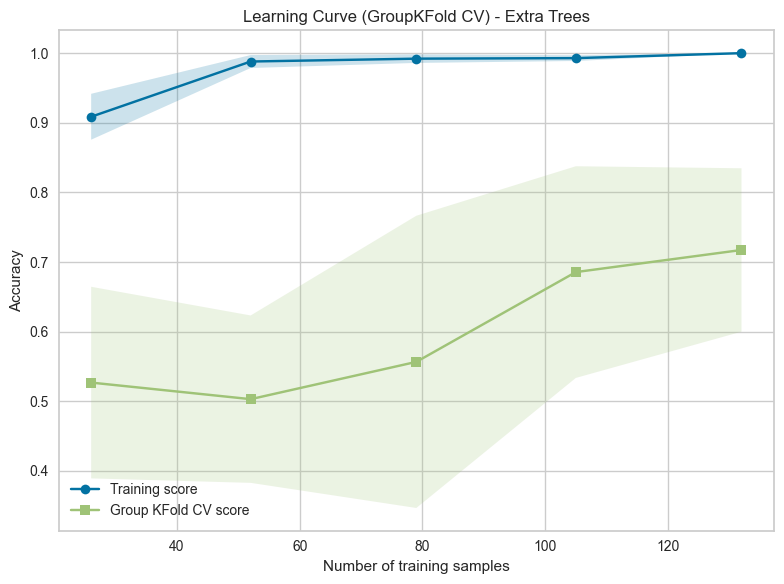

In [16]:
# Now retraining the extra trees classifier with selected hyperparameters on the full training dataset using scikit learn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, GroupKFold
import numpy as np
import matplotlib.pyplot as plt

# creating the extra trees classifier with the tuned hyperparameters
final_et_model = ExtraTreesClassifier(
    n_estimators=200, 
    max_depth=15, 
    max_features=None, 
    min_samples_leaf=4, 
    min_samples_split=4, 
    random_state=42
)

# preparing X_train, X_test, y_train, and y_test, train_data and test_data were defined earlier in this notebook
# first removing subject_id column, not useful feature
train_data_noid = train_data.drop(columns=['subject_id'])
test_data_noid = test_data.drop(columns=['subject_id'])

# assign target variable to y and remove from X
X_train = train_data_noid.drop(columns=['label'])
y_train = train_data_noid['label']

X_test = test_data_noid.drop(columns=['label'])
y_test = test_data_noid['label']

# convert y_test and y_train to numeric (glioma: 0, metastasis: 1)
label_map = {'glioma': 0, 'metastasis': 1}
y_train = y_train.map(label_map)
y_test = y_test.map(label_map)

# perform z-score standardization only on X, though this is most likely unnecessary for decision trees
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# creating a learning curve to evaluate whether this model is overfitting/underfitting
group_kfold = GroupKFold(n_splits=8)
groups = train_data['subject_id']
train_sizes, train_scores, val_scores = learning_curve(
    final_et_model,                   
    X_train_scaled, y_train,        
    cv=group_kfold,   
    groups=groups,         
    scoring='accuracy',             
    n_jobs=-1,              
    train_sizes=np.linspace(0.2, 1.0, 5) 
)

# plotting the learning curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_scores_mean, 's-', label="Group KFold CV score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2)
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (GroupKFold CV) - Extra Trees")
plt.legend()
plt.tight_layout()
plt.show()

suggestions on how to look at overfitting. external cross-validation, do PCA and see if the two classes are separable, can try using kernel function to transform our data before training Extra Trees

In [17]:
# train the model on the entire training set
final_et_model.fit(X_train_scaled, y_train)

# evaluation on test set
y_test_pred = final_et_model.predict(X_test_scaled)
y_test_prob = final_et_model.predict_proba(X_test_scaled)[:, 1]

#### Now generating figures and metrics to evaluate the performance of the extra trees classifier.

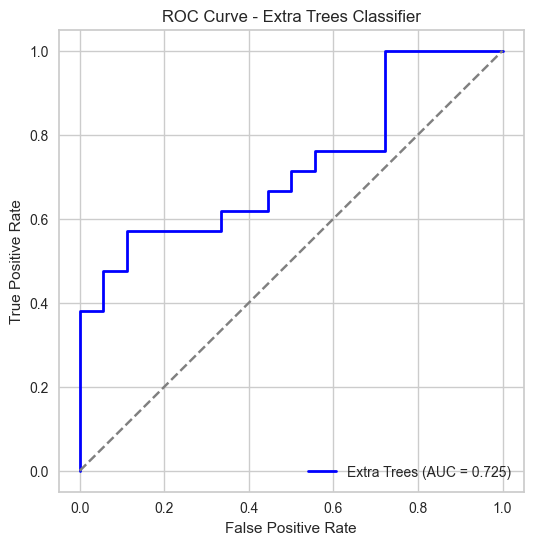

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# making ROC plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Extra Trees (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees Classifier')
plt.legend(loc='lower right')
plt.show()

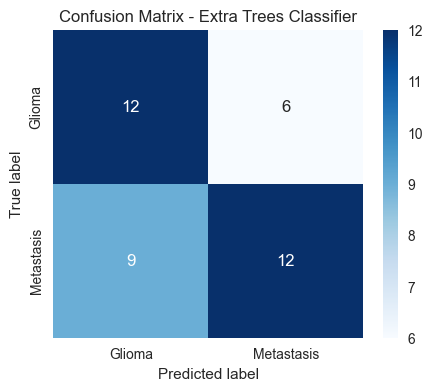

In [19]:
# making a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Glioma', 'Metastasis'],
            yticklabels=['Glioma', 'Metastasis'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Extra Trees Classifier")
plt.show()

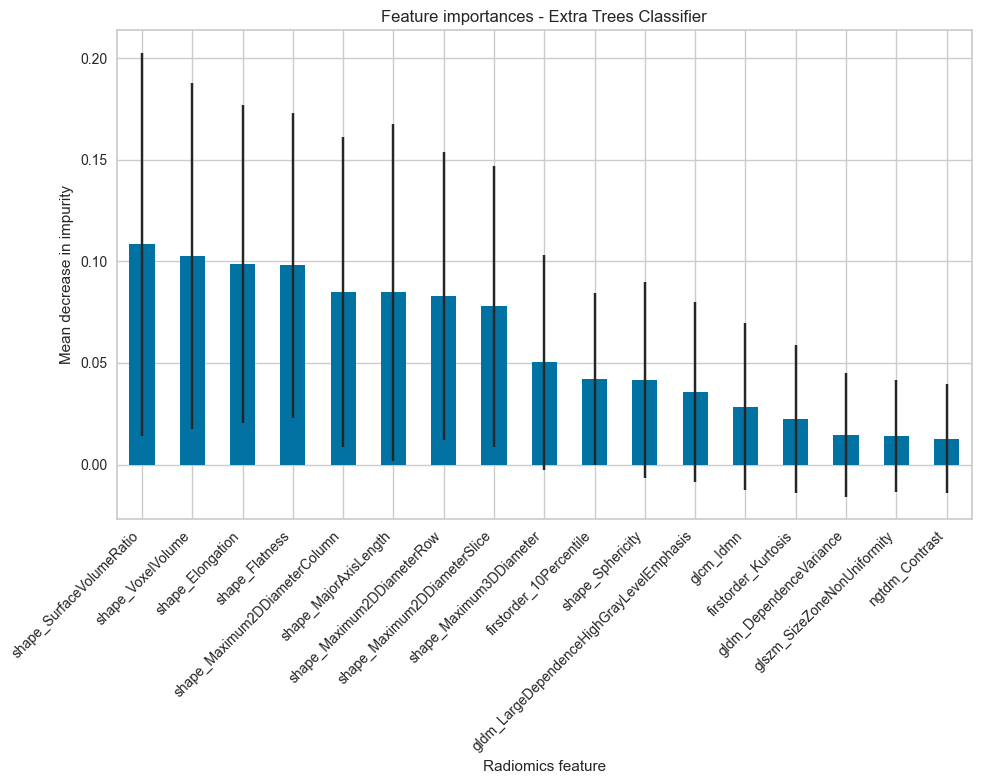

In [20]:
# creating a feature importance plot
# feature importance plots are based on the mean decrease in impurity
import numpy as np

# getting importance values and feature names
importances = final_et_model.feature_importances_
features = X_train.columns

# calculating standard deviation
std_importances = np.std([tree.feature_importances_ for tree in final_et_model.estimators_], axis=0)

# sorting features for plotting
indices = np.argsort(importances)[::-1]

et_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots(figsize=(10,8))
et_importances.sort_values(ascending=False).plot.bar(yerr=std_importances[et_importances.argsort()[::-1]], ax=ax)
ax.set_title("Feature importances - Extra Trees Classifier")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Radiomics feature")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
fig.tight_layout()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy:  {accuracy:.3f}")
print(f"AUC:      {roc_auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 score:  {f1:.3f}")

Accuracy:  0.615
AUC:      0.725
Precision: 0.667
Recall:    0.571
F1 score:  0.615
